#                                 TEXT CLASSIFICATION
##                                ( using multinomial Naive Bayes )

In [1]:
from sklearn import datasets
import numpy as np
news=datasets.fetch_20newsgroups(subset='all')

### Finding and saving all the stop words so that we dont count and add that in our dictionary

In [2]:
## The list of stop words
# Stop Words
stop_words=["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the","i","id","im","know","acually","ill","thats"]


In [3]:
m=stop_words.copy()
for i in range(len(m)):
    m[i]=m[i].capitalize()
stop= stop_words + m
print(stop)

['a', 'the', 'able', 'about', 'data', 'about', 'above', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 

### Making dictionaries with all words in it (also filtering out the unused word and other words in data)

In [4]:
d={}
for i in news.data:
    a=i.split()
    for j in a:
        j=j.replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", "").replace("/", "").replace("_", "").replace("]", "").replace(")", "").replace("[", "")
        j=j.replace("?", "").replace(":", "").replace(",", "").replace(".","").replace("-","").replace("(","").replace(">","").replace('"',"").replace("'","").replace("1","").replace("0","").replace("2","")
        if(j not in d and j not in stop and len(j)>2):
            d[j]=1
        elif(j not in stop and len(j)>2):
            d[j]+=1
for key in d.copy():
    if (d[key]) < 20:
        del d[key]
dic=d
import operator
dic = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
dic

{'Subject': 19471,
 'Lines': 18912,
 'Organization': 18258,
 'writes': 13315,
 'article': 11312,
 'University': 9148,
 'like': 9134,
 'people': 8753,
 'dont': 8664,
 'just': 8127,
 'think': 7277,
 'use': 6336,
 'time': 6030,
 'good': 5183,
 'does': 5042,
 'way': 4747,
 'make': 4552,
 'say': 4407,
 'Distribution': 4225,
 'NntpPostingHost': 4108,
 'want': 4076,
 'right': 3995,
 'NNTPPostingHost': 3955,
 'said': 3932,
 'used': 3902,
 'new': 3782,
 'did': 3721,
 'need': 3621,
 'God': 3594,
 'work': 3556,
 'world': 3390,
 'problem': 3386,
 'believe': 3352,
 'really': 3321,
 'MAXAXAXAXAXAXAXAXAXAXAXAXAXAXAX': 3298,
 'Ive': 3186,
 'going': 3166,
 'years': 3005,
 'point': 2876,
 'using': 2853,
 'ReplyTo': 2797,
 'things': 2787,
 'better': 2736,
 'question': 2689,
 'bit': 2617,
 'year': 2579,
 'information': 2578,
 'read': 2577,
 'file': 2522,
 'David': 2517,
 'government': 2514,
 'help': 2507,
 'got': 2507,
 'doesnt': 2505,
 'number': 2504,
 'sure': 2465,
 'thing': 2435,
 'New': 2352,
 'availa

### Plotting a graph so as for the selection of our features 

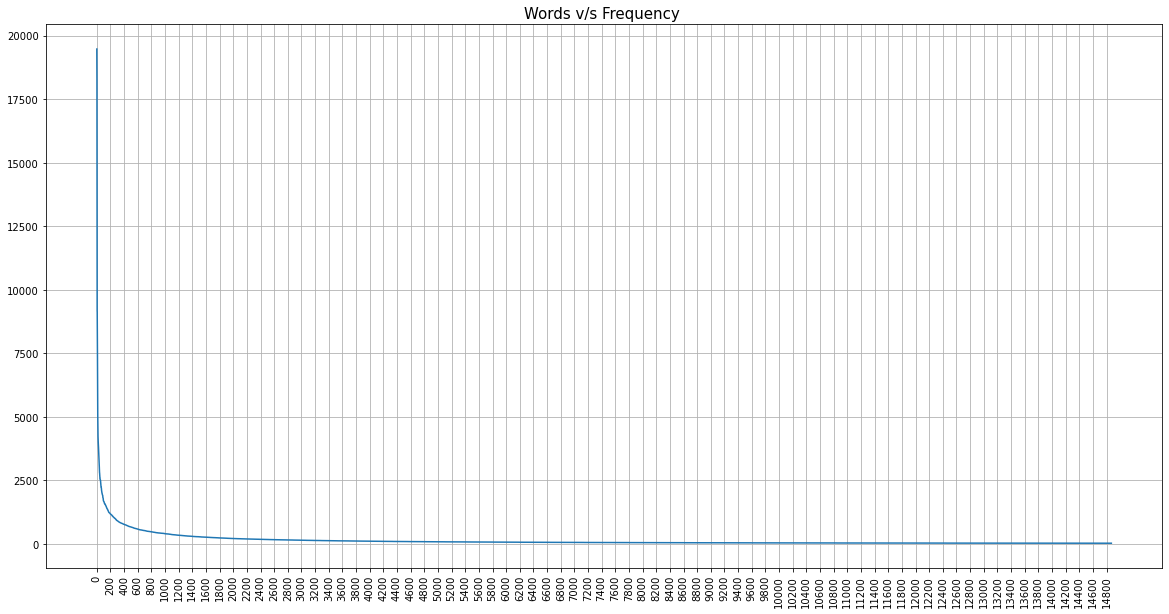

<Figure size 1440x1440 with 0 Axes>

In [5]:
words=[i for i in dic]
freq=[dic[i] for i in dic]
import matplotlib.pyplot as ply
ply.figure(figsize=(20,10))
ply.plot(freq)
ply.grid()
ply.title("Words v/s Frequency ",size = 15)
ply.xticks(np.arange(0, 15000, step=200),rotation=90) 
ply.figure(figsize=(20,20))
ply.show()

### From the zipf's law graph we derive that for feature selection we could take the first 6000 words

In [7]:
feature_words=words[0:6000]
feature_words
dataset=[]
dataset.append(feature_words)
test_values=[0 for i in range(6000)]

for i in news.data:
    a=i.split()
    temp_dic=dict(zip(feature_words, test_values))
    for j in a:
        if(j in feature_words):
            temp_dic[j]+=1
    freq=[temp_dic[i] for i in temp_dic]
    dataset.append(freq)

### Making the dataframe of our infered and changed data

In [8]:
import pandas as pd
df=pd.DataFrame(dataset)
df.columns = df.iloc[0]
df.drop(0,inplace=True)
df.reset_index(drop = True)
cl_dic={}
j=0
for i in range(20):
    cl_dic[i]=news.target_names[i]
    j+=1
class_=[]
for i in news.target:
    class_.append(cl_dic[i])
df['classifation_grp']=class_
df

,Subject,Lines,Organization,writes,article,University,like,people,dont,just,...,minus,cunixbcccolumbiaedu,formatting,Optilink,Clarkson,revenue,Standards,failing,attribute,classifation_grp
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,rec.sport.hockey
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.sys.ibm.pc.hardware
3,0,0,0,0,0,2,2,3,0,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
4,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.sys.ibm.pc.hardware
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.sys.mac.hardware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18842,0,0,0,0,0,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,sci.med
18843,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.electronics
18844,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,comp.sys.ibm.pc.hardware
18845,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comp.graphics


In [9]:
## Appending data to CSV file
df.to_csv("text_classification.csv",index=False)

### Implementation of Sklearn Classifier :

In [10]:
X=df[df.columns[:-1]].values
Y=df["classifation_grp"].values


### Splitting out data for Training and Testing

In [11]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=0)

## Multinomial Naive Bayes :

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

### Classification Report of aur Prediction

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
print("Classification Report :")
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Classification Report :
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.81      0.76       205
           comp.graphics       0.64      0.75      0.69       245
 comp.os.ms-windows.misc       0.66      0.76      0.70       250
comp.sys.ibm.pc.hardware       0.67      0.70      0.68       243
   comp.sys.mac.hardware       0.77      0.73      0.75       255
          comp.windows.x       0.83      0.76      0.79       240
            misc.forsale       0.75      0.82      0.78       249
               rec.autos       0.79      0.86      0.82       219
         rec.motorcycles       0.89      0.87      0.88       246
      rec.sport.baseball       0.92      0.93      0.92       227
        rec.sport.hockey       0.96      0.92      0.94       287
               sci.crypt       0.91      0.86      0.88       234
         sci.electronics       0.79      0.72      0.75       247
                 sci.med       0.93      0.85      